# Анализ причин убыточности приложения 

***Цель исследования*** - выявить причины убыточности приложения, дать рекомендации по улучшению показателей или дальнейшим исследованиям

***Описание исследования***

В нашем распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Нужно изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

***Ход исследования***

Необходимо проверить данные на дубликаты, типы данных в колонках. Далее добавить необходимые для анализа функции. Произвести исследовательский анализ данных, а затем анализ основных маркетинговых показателей.

## Обзор данных

Импортируем необходимые библиотеки для работы с данными:

In [1]:
# импортируем необходимые библиотеки для работы с данными
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from termcolor import colored
import seaborn as sns

Откроем файлы, которые нам были предоставлены для исследования и сохраним в переменных:

In [2]:
# открываем файлы и сохраняем их в переменных
visits, orders, costs = (pd.read_csv('/datasets/visits_info_short.csv'),
                        pd.read_csv('/datasets/orders_info_short.csv'),
                        pd.read_csv('/datasets/costs_info_short.csv'))

Для полного обзора таблиц необходимо посмотреть общую информацию о таблицах, первые 5 строк, наличие пропусков и дубликатов в данных:

In [3]:
# функция для обзора данных в таблице
def view(data, name):
    print(colored('Обзор данных таблицы', 'blue'), name)
    print()
    print('Первые 5 строк данных')
    display(data.head()) # Выводим первые 5 строк
    print()
    print('Информация по таблице')
    display(data.info()) # Выводим инфо по датасету
    print()
    print('Пропуски')
    display(data.isna().sum())
    print()
    print('Количество явных дубликатов:', data.duplicated().sum())
    print()
    
# выводим данные по таблице visits
view(visits, colored('с визитами пользователей', 'blue'))

Обзор данных таблицы с визитами пользователей

Первые 5 строк данных


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



Информация по таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None


Пропуски


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


Количество явных дубликатов: 0



Явных дубликатов и пропусков в данных нет. 
Согласно документации:

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя
    
Видим, что сейчас столбцы с датами в формате object, необходимо перевести их в формат datetime для дальнейшего анализа.

In [4]:
# выводим данные по таблице orders
view(orders, colored('о заказах', 'blue'))

Обзор данных таблицы о заказах

Первые 5 строк данных


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



Информация по таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None


Пропуски


User Id     0
Event Dt    0
Revenue     0
dtype: int64


Количество явных дубликатов: 0



Также нет пропусков и явных дубликатов. 
Согласно документации:

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка
    
Дата и время вновь в формате object, необходимо перевести в формат datetime.

In [5]:
# выводим данные по таблице costs
view(costs, colored('о расходах на привлечение', 'blue'))

Обзор данных таблицы о расходах на привлечение

Первые 5 строк данных


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1



Информация по таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None


Пропуски


dt         0
Channel    0
costs      0
dtype: int64


Количество явных дубликатов: 0



Пропусков и дубликатов вновь нет. 
Согласно документации:

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день
    
Дата вновь у нас в формате object, необходимо перевести в формат datetime для дальнейшего анализа.     

### Вывод

Мы открыли три таблицы, которые были предоставлены нам для проведения исследования. Согласно им:
- Дубликатов и пропусков данных нет, работать с ними не требуется
- Необходимо поменять формат дат для дельнейшей работы
- Наименования столбцов представлены в разном регистре, необходимо привести к единому стилю

## Предобработка данных

Для удобства дальнейшей работы приведем названия столбцов во всех таблицах к единому стилю. Для этого необходимо привести все названия к одному регистру и убрать пробелы между словами, если название столбца состоит из двух слов:

In [6]:
# приводим все названия столбцов в трех таблицах к нижнему регистру
for i in visits, orders, costs:
    i.columns = i.columns.str.lower()
    
# убираем пробелы между словами в таблице visits, проверяем результат    
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [7]:
# убираем пробелы между словами в таблице orders, проверяем результат    
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [8]:
# проверяем результат в таблице costs
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

Теперь названия отображаются корректно. Поменяем тип данных в столбцах с датой и временем с типа object на тип datetime:

In [9]:
# меняем тип данных с object на datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Названия столбцов приведены к хорошему стилю, типы данных приведены к необходимым для анализа. Можем приступать к анализу бизнес-показателей. 

## Добавление необходимых функций для проведения анализа

Для расчета метрик и анализа ситуации с приложением нам потребуются функции get_profiles(), get_retention(), get_conversion() и get_ltv(). Добавим их сюда, чтобы использовать на последующих шагах:

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Добавим функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi()

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [18]:
# функция для визуализации конверсии по каналам

def plot_conversion_channel(conversion, conversion_history, horizon, window=14):

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    conversion.T.plot(grid=True, figsize=(15, 5))
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, figsize=(15, 5))
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4, sharey=ax3)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации LTV и ROI по каналам привлечения

def plot_ltv_roi_channel(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
    # первый график — кривые ltv
    ltv.T.plot(grid=True, figsize=(15, 5))
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, figsize=(15, 10))
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, figsize=(15, 5))
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    roi.T.plot(grid=True, figsize=(15, 5))
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI') 
    
    # пятый график — динамика roi
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, figsize=(15, 8))
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Построем профили пользователей. Определим минимальную и максимальную дату привлечения пользователей

Для построения профилей пользователей используем функцию get_profiles. Так как у вас нет таблицы events зафиксируем, что events = None, чтобы не сломать функцию в момент построения профилей:

In [21]:
# фиксируем, что у нас нет таблицы events
events = None
# строим профили пользователей
profiles = get_profiles(visits, orders, events, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Проверим минимальную и максимальную даты привлечения пользователей:

In [22]:
# проверяем минимальную дату привленичения пользователей
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [23]:
# проверяем максимальную дату привлечения пользователей
profiles['dt'].max()

datetime.date(2019, 10, 27)

Минимальная и максимальная даты привлечения соответствуют условиям задачи. Минимальной является дата - 1 мая 2019 года, максимальной - 27 октября 2019 года. 

### Изучение особенностей пользователей

Для изучения того из каких стран, с каких каналов привлечения и с каких устройств чаще приходят пользователи в приложение создадим функцию, которой передадим таблицу с профилями пользователей и тот столбец, по которому будем производить группировку пользователей:

In [24]:
# функция группирует данные о количестве пользователей по заданному условию
# выводит статистику обо всех пользователях и платящих, и о доле платящих от всех
def user_features(profiles, name):
    profiles_group_all = (profiles.groupby(name)['user_id'].count()
                   .reset_index()
                   .rename(columns={'user_id': 'count_user'})
                   .sort_values(by='count_user', ascending=False))
    profiles_group_all['share'] = ((profiles_group_all['count_user']/(profiles_group_all['count_user'].sum()))
                               .apply(lambda x: format(x, '.2%')))
    
    profiles_group_payer = profiles[profiles['payer']==True]
    profiles_group_payer = (profiles_group_payer.groupby(name)['user_id'].count()
                   .reset_index()
                   .rename(columns={'user_id': 'count_user'})
                   .sort_values(by='count_user', ascending=False))
    profiles_group_payer['share'] = ((profiles_group_payer['count_user']/(profiles_group_payer['count_user'].sum()))
                                     .apply(lambda x: format(x, '.2%')))
    
    profiles_group = (profiles_group_all[[name ,'count_user']].merge(profiles_group_payer, how='left', on=name)
                     .drop(columns=['share']).rename(columns={'count_user_x': 'all_user', 'count_user_y':'payer_user'}))
    profiles_group['share'] = (profiles_group['payer_user']/profiles_group['all_user'])  
    profiles_group = profiles_group.sort_values(by='share', ascending=False)
    profiles_group['share'] = profiles_group['share'].apply("{0:.2%}".format)
    
    return (print(colored('Данные по всем пользователям', 'blue')),
            display(profiles_group_all),
            print(colored('Данные по платящим пользователям', 'blue')),
            display(profiles_group_payer),
            print(colored('Данные по доле платящих пользователей от всех ', 'blue')),           
            display(profiles_group))

#### Количество пользователей по региону привлечения

Применим функцию и выявим из каких регионов приходит наибольшее количество пользователей, и какой регион привлекает наибольшее количество именно платящих пользователей:

In [25]:
# применяем функцию, передаем профили пользователи и столбец с регионом
user_features(profiles, 'region')

Данные по всем пользователям


,region,count_user,share
3,United States,100002,66.66%
2,UK,17575,11.72%
0,France,17450,11.63%
1,Germany,14981,9.99%


Данные по платящим пользователям


,region,count_user,share
3,United States,6902,77.72%
2,UK,700,7.88%
0,France,663,7.47%
1,Germany,616,6.94%


Данные по доле платящих пользователей от всех 


,region,all_user,payer_user,share
0,United States,100002,6902,6.90%
3,Germany,14981,616,4.11%
1,UK,17575,700,3.98%
2,France,17450,663,3.80%


(None, None, None, None, None, None)

Самая большая доля пользователей приложения пришли из СШA, они же чаще становились именно платящими пользователями. Меньше всего пользователей пришли из Германии, однако они чаще становились платящими в сравнении с пользователями Великобритании и Франции. Хотя отрыв в этом плане не очень большой, однако он есть. 

#### Количество пользователей в зависимости от устройства

Посмотрим с помощью функции распредение по устройствам:

In [26]:
# применяем функцию, передаем профили пользователи и столбец с устройством
user_features(profiles, 'device')

Данные по всем пользователям


,device,count_user,share
3,iPhone,54479,36.32%
0,Android,35032,23.35%
2,PC,30455,20.30%
1,Mac,30042,20.03%


Данные по платящим пользователям


,device,count_user,share
3,iPhone,3382,38.08%
0,Android,2050,23.08%
1,Mac,1912,21.53%
2,PC,1537,17.31%


Данные по доле платящих пользователей от всех 


,device,all_user,payer_user,share
3,Mac,30042,1912,6.36%
0,iPhone,54479,3382,6.21%
1,Android,35032,2050,5.85%
2,PC,30455,1537,5.05%


(None, None, None, None, None, None)

Больше всего пользователей по количеству используют iPhone причем с большим отрывом. Однако если проверить долю платящих от всех привлеченных пользователей использующих iPhone, то они уступили Mac. 
Пользователей, использующих Mac меньше всего, однако доля платящих среди них существенно выше, чем у тех кто использует иные устройства.

#### Количество пользователей по каналу привлечения

Проверим какое количество пользователей приходит из разных каналов привлечения и их соотношение:

In [27]:
# применяем функцию, передаем профили пользователи и столбец с каналом привлечения
user_features(profiles, 'channel')

Данные по всем пользователям


,channel,count_user,share
10,organic,56439,37.62%
1,FaceBoom,29144,19.43%
6,TipTop,19561,13.04%
4,OppleCreativeMedia,8605,5.74%
2,LeapBob,8553,5.70%
7,WahooNetBanner,8553,5.70%
5,RocketSuperAds,4448,2.97%
3,MediaTornado,4364,2.91%
8,YRabbit,4312,2.87%
0,AdNonSense,3880,2.59%


Данные по платящим пользователям


,channel,count_user,share
1,FaceBoom,3557,40.05%
6,TipTop,1878,21.15%
10,organic,1160,13.06%
7,WahooNetBanner,453,5.10%
0,AdNonSense,440,4.95%
5,RocketSuperAds,352,3.96%
2,LeapBob,262,2.95%
4,OppleCreativeMedia,233,2.62%
9,lambdaMediaAds,225,2.53%
8,YRabbit,165,1.86%


Данные по доле платящих пользователей от всех 


,channel,all_user,payer_user,share
1,FaceBoom,29144,3557,12.20%
9,AdNonSense,3880,440,11.34%
10,lambdaMediaAds,2149,225,10.47%
2,TipTop,19561,1878,9.60%
6,RocketSuperAds,4448,352,7.91%
5,WahooNetBanner,8553,453,5.30%
8,YRabbit,4312,165,3.83%
7,MediaTornado,4364,156,3.57%
4,LeapBob,8553,262,3.06%
3,OppleCreativeMedia,8605,233,2.71%


(None, None, None, None, None, None)

Больше всего пользователей к нам приходят из органики, количество платящих из них от общего количества платящих клиентов нашего приложения довольно велико, однако если проверить долю пользователей, которые приходят из органики, а затем совершают покупки, то видим, что она совсем не большая. 

Каналы привлечения с наименьшем количеством привлеченных пользователей AdNonSense и lambdaMediaAds имеют одну из самых больших долей платящих пользователей от общего количества. 
Лучше всего показал себя канал FaceBoom, он везде в топе. 

А вот TipTop хотя привлекает много пользователей, но процент платящих от них меньше, чем других более мелких каналов привлечения. 

### Количество пользователей в зависимости от нескольких характеристик

Для более детального анализа рассмотрим распределение пользователей в зависимости сразу от нескольких характеристик. В этом случае мы сможем сформировать более точный портрет пользователя. 
Сначала посмотрим каково распределение у нас по устройству и каналам привлечения:

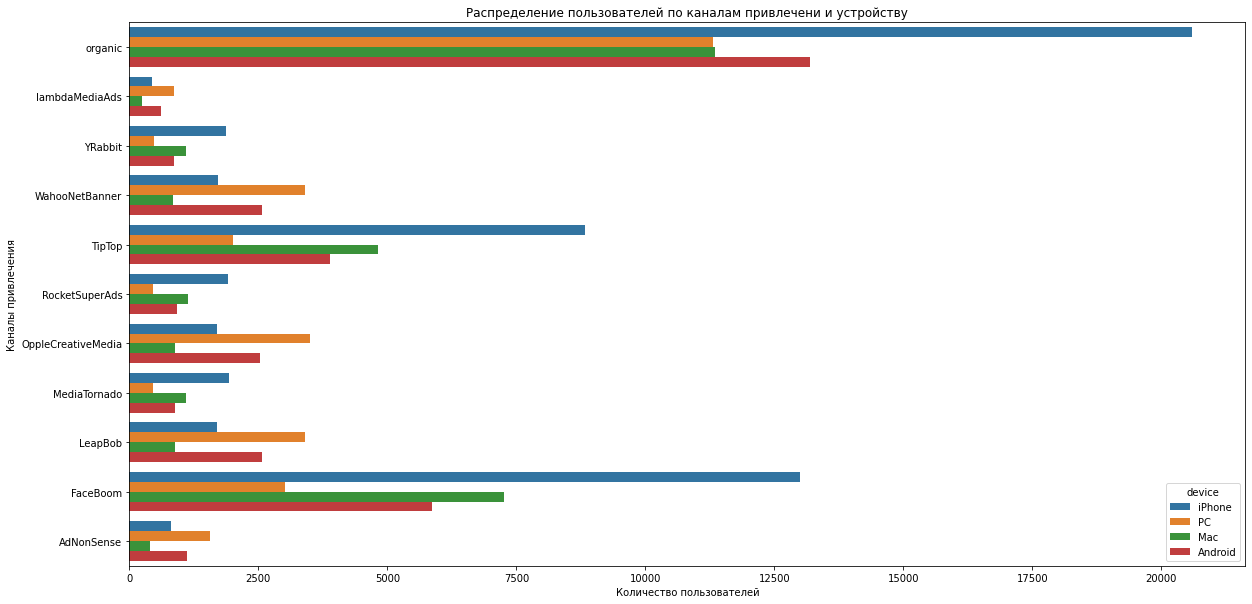

In [28]:
# группируем профили по каналу и устройству
profiles_device = (profiles.groupby(['channel', 'device'])['user_id'].count()
                   .reset_index()
                   .rename(columns={'user_id': 'count_user'})
                   .sort_values(by='channel', ascending=False))

# строем диаграмму
plt.figure(figsize=(20, 10))
sns.barplot(data=profiles_device, x='count_user', y='channel', hue='device')
plt.title('Распределение пользователей по каналам привлечени и устройству')
plt.xlabel('Количество пользователей')
plt.ylabel('Каналы привлечения')
plt.show()

Больше всего пользователей использующие МАС и iPhone приходя с площадок FaceBoom и TipTop. Android также заметно больше на этих площадках. А вот пользователи с РС приходят с более мелких каналов. 

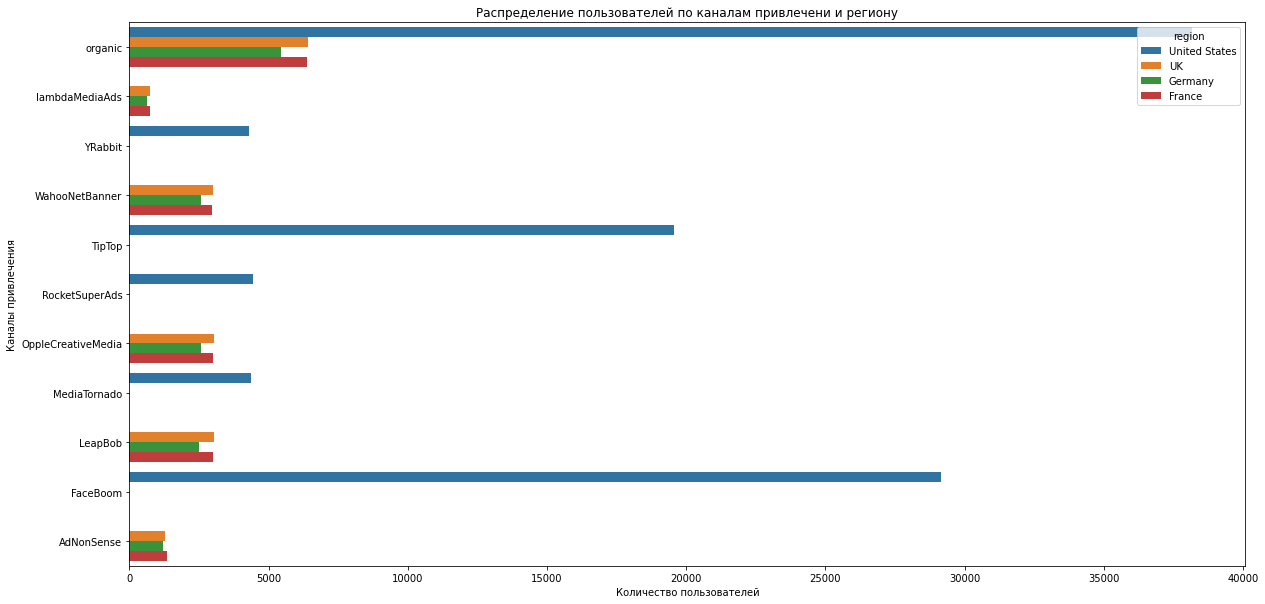

In [29]:
# группируем данные по каналу и региону 
profiles_channel = (profiles.groupby(['channel', 'region'])['user_id'].count()
                   .reset_index()
                   .rename(columns={'user_id': 'count_user'})
                   .sort_values(by='channel', ascending=False))

# строим график 
plt.figure(figsize=(20, 10))
sns.barplot(data=profiles_channel, x='count_user', y='channel', hue='region')
plt.title('Распределение пользователей по каналам привлечени и региону')
plt.xlabel('Количество пользователей')
plt.ylabel('Каналы привлечения')
plt.show()

Вот тут данные получились еще интереснее. У нас не просто больше всего пользователей из США, они еще и приходят по большей части с двух наших площадок - FaceBoom и TipTop. 

Необходимо проверить на сколько прибыльно привлечение данных клиентов. 

### Вывод

Мы составили профили пользователей, и проверили минимальную и максимальную даты привлечения. Минимальная и максимальная даты привлечения соответствуют данным документации - это 1 мая 2019 года и 27 октября 2019 года. 

Далее мы провели анализ количества пользователей в зависимости от региона, канала привлечения и устройства. 
По данным видно, что не всегда там, где получается привлечь больше всего пользователей, в итоге доля платящих пользователей большая. 

Что мы выявили:
- больше всего пользователей приходят из США, из них же больше всего платящих пользователей в сравнении с другими регионами
- меньше всего пользователей приходят из Германии, однако доля платящих из них выше, чем у Великобритании и Франции, где общее количество приведенных пользователей больше, чем в Германии
- больше всего пользователей пользуются iPhone, однако доля платящих от общего числа привлеченных пользователей использующих iPhone	неожиданно не так велика
- меньше всего пользователей используют Mac, однако доля платящих среди них больше, чем у пользователей, которые используют другие устройства
- больше всего пользователей приходят органически, доля платящих пользователей пришедших таким образом от всех платящих весьма большая, однако доля платящих от всех пользователей пришедших таким образом меньше, чем по всем остальным источникам
- FaceBoom на втором месте по количеству пользователей всего, так и платящих
- Многие каналы, откуда приходят больше пользователей, имеют меньшую долю платящих пользователей (например, OppleCreativeMedia, TipTop или LeapBob)
- больше всего пользователей использующих МАС, IPhone и Android приходят с площадок FaceBoom и TipTop, пользователи РС в основном приходят с более мелких площадок
- основной трафик из США приходит с площадок FaceBoom и TipTop, причем на этих площадках нет пользователей из других стран

## Расчет маркетинговых расходов

Для дальнейшего анализа проверим сколько всего средств было потрачено на рекламу с мая по октябрь суммарно по всем каналам привлечения:

In [30]:
# суммарные траты на привлечение по всем каналам
costs['costs'].sum()

105497.30000000002

Однако данные о суммарных тратах нам говорят мало что. Необходимо проверить на какие каналы мы тратим больше средств на привлечение, а на какие меньше:

In [31]:
# группируем данные по суммарным продажам на привлечение по каждому из каналов
costs_channel = (costs.groupby('channel')['costs'].sum()
                   .reset_index()
                   .sort_values(by='costs', ascending=False))

costs_channel

,channel,costs
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


Самые большие траты на привлечение идут по площадкам TipTop и FaceBoom. На других они существенно меньше. 
Помним, что у площадки FaceBoom самая высокая доля платящих пользователей от всех, которые пришли с нее. TipTop такой тенденцией похвастаться не может. 

Посмотрим на суммарные данные визуально:

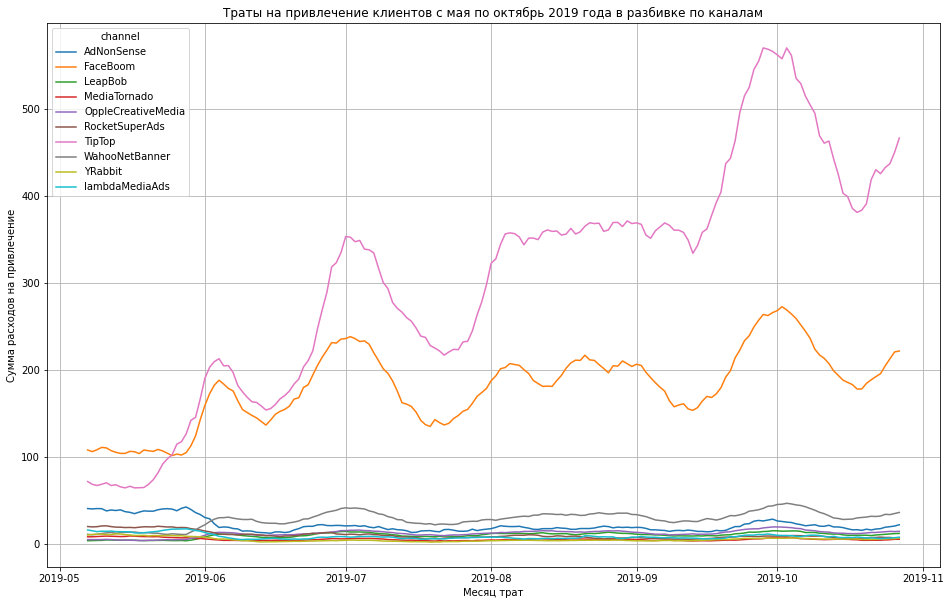

In [32]:
# формируем сводную таблицу 
dinam_costs = costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum')

# применяем функцию фильтраци, чтобы график был более плавным, строим график
filter_data(dinam_costs, 7).plot(grid=True, figsize=(16, 10))

plt.title('Траты на привлечение клиентов с мая по октябрь 2019 года в разбивке по каналам')
plt.xlabel('Месяц трат')
plt.ylabel('Сумма расходов на привлечение')
plt.show()

Как мы и отметили из таблицы, особенно выделяются две площадки. При этом траты на привлечение по площадке FaceBoom выглядят более постоянными, хоть и имеются некоторые скачки. 

Траты по площадке TipTop постоянно уходят в рост и имеют более выраженные пики. 

В целом по всем площадкам мы видим пик в июле и октябре. Рассмотрим траты на привлечение по времени:

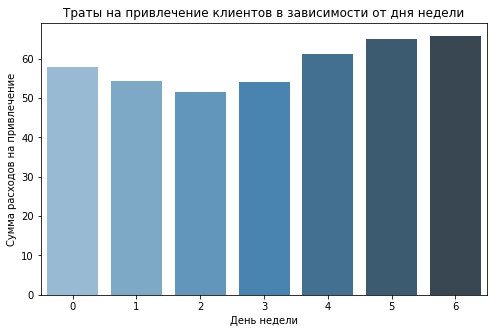

In [33]:
# формируем новую таблицу, добавляем в нее дополнительные столбцы с днем недели и месяцем
costs_time = costs
costs_time['dt'] = pd.to_datetime(costs_time['dt'])
costs_time['weekday'] = costs_time['dt'].dt.weekday
costs_time['month'] = costs_time['dt'].dt.month

# группируем данные по дням недели, проверям сколько в среднем тратим на привлечение в каждый из дней
costs_weekday = (costs_time.groupby('weekday')['costs'].mean()
                   .reset_index())

plt.figure(figsize=(8,5))
sns.barplot(data=costs_weekday, x='weekday', y='costs', palette="Blues_d")
plt.title('Траты на привлечение клиентов в зависимости от дня недели')
plt.xlabel('День недели')
plt.ylabel('Сумма расходов на привлечение')
plt.show()

Посмотрим тут именно средние продажи в каждый из дней недели. Видим, что основные траты на привлечение приходятся на выходные дни. Меньше всего в среднем на привлечение тратиться со вторника по четверг. 

Рассмотрим данные по месяцам:

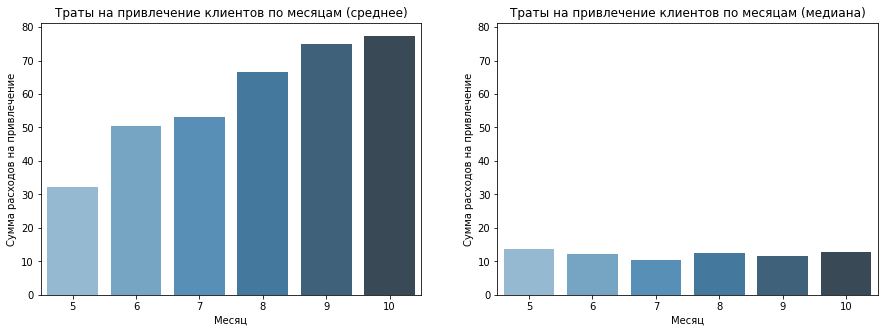

In [34]:
# создаем таблицы  со средними и медианными тратами в месяц на привлечение клиентов по всем каналам
costs_month = (costs_time.groupby('month')['costs'].mean()
                   .reset_index())

costs_month_median = (costs_time.groupby('month')['costs'].median()
                   .reset_index())

# строим диаграммы по данным таблицам
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=costs_month, x='month', y='costs', palette="Blues_d")
plt.title('Траты на привлечение клиентов по месяцам (среднее)')
plt.xlabel('Месяц')
plt.ylabel('Сумма расходов на привлечение')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
sns.barplot(data=costs_month_median , x='month', y='costs', palette="Blues_d")
plt.title('Траты на привлечение клиентов по месяцам (медиана)')
plt.xlabel('Месяц')
plt.ylabel('Сумма расходов на привлечение')
plt.show()

Если брать средние данные на привлечение клиентов со всех каналов, то мы видим планомерный рост затрат на привлечение. 
Если взять медианные показатели по месяцам, то мы видим, что затраты находятся примерно на одном уровне, причем он гораздо ниже, чем средние затраты. 

Исходя из этого мы можем сделать вывод, что за основную часть привлекаемого трафика мы платим месяц от месяца примерно одинаково. На среднее же, в отличии от медианы, влияют выбросы значений. Это значит, что от месяца к месяцу у нас увеличивает стоимость привлечения дополнительных, более дорогих пользователей. Исходя из прошлых диаграмм можем предположить, что такие пользователи приходят к нам с площадок TipTop и FaceBoom. Это необходимо проверить. 

Узнаем стоимость привлечения одного пользователя по каждому из каналов. 
Для того, чтобы данные были корректны необходимо убрать из таблицы profiles данные по пользователям, которые пришли к нам из органического трафика. Мы не платим за них, поэтому данные о таких пользователях будут влиять на дальнейшие расчеты. 

In [35]:
# убираем органических пользователей из таблицы с профилями пользователей
profiles = profiles[profiles['channel'] != 'organic']

Посчитаем среднее значение на привлечение одного пользователя по всем каналам:

In [36]:
# рассчитываем средние траты на привлечение одного пользователя
profiles['acquisition_cost'].mean()

1.1274813239427588

Теперь посмотрим сколько в среднем мы тратим на привлечение одного пользователя в разбивке по площадкам:

In [37]:
# группируем данные по каналу привлечения и рассчитываем среднюю стоимость привлечения
channel_cac = (profiles.groupby('channel')['acquisition_cost'].mean()
                   .reset_index()
                   .sort_values(by='acquisition_cost', ascending=False))

channel_cac

,channel,acquisition_cost
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


С площадки TipTop приходят в среднем самые дорогие пользователи. Причем они обходятся нам в 2 раза дороже чем пользователи площадки, которая находится на втором месте, и в 2 раза больше, чем средняя стоимость привлечения по всем каналам. 

Посмотрим данные также в динамике:

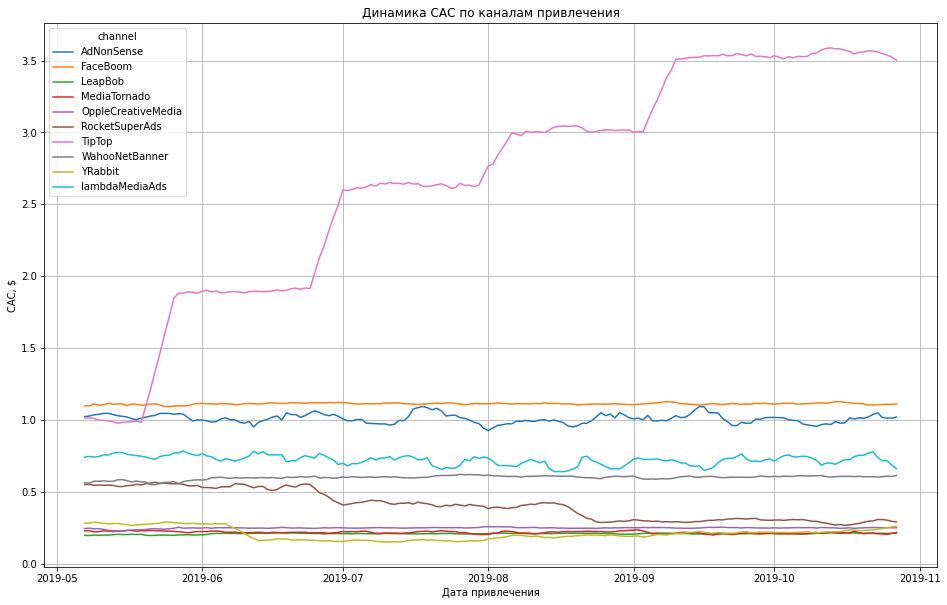

In [38]:
# строим сводную таблицу с датой привлечения, каналом и среднем показателем стоимости привлечения одного клиента
dinam_cac = profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')


filter_data(dinam_cac, 7).plot(grid=True, figsize=(16, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Когда мы проверяли суммарно сколько тратим по каждой площадке на привлечение пользователей, у нас были два лидера. 
Однако при рассмотрении средней стоимости привлечения для одного пользователя у нас очень выбивается площадка TipTop. Затраты на привлечение одного пользователя по ней сильно выше, чем по другим площадкам. При этом они неуклонно растут от месяца к месяцу.

### Вывод

Мы рассчитали общие траты на привлечение пользователей в целом, по каналам, по дням недели и по месяцам. 
Больше всего мы тратим на привлечение пользователей с площадок TipTop и FaceBoom. Больше всего мы тратим средств на привлечение на выходных, меньше всего со вторника по четверг. 

В среднем траты на привлечение клиентов растут от месяца к месяцу. Однако если взять медианные данные, то видно, что затраты находятся на одном уровне. Это значит, что у нас расчет количество более дорогих клиентов. 

Мы рассмотрели стоимость привлечения одного клиента. Самая высокая стоимость привлечения одного клиента у нас получилась по площадке TipTop, и данная стоимость растет. 

## Анализ окупаемости

Для анализа окупаемости рекламы зададим момент и горизонт анализа. Горизонт анализа в нашем случае составит 14 дней, момент анализа - 1 ноября 2019 года.

In [39]:
# определяем момент анализа
observation_date = datetime(2019, 11, 1).date()
# определяем горизонт анализа
horizon_days = 14

Далее построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Анализировать будем общие данные по всем клиентам, далее с разбивкой по устройствам, регионам и каналам привлечения. 
Для построения и визуализации данных будем использовать заранее созданные функции get_ltv() и plot_ltv_roi()

### Анализ общей окупаемости рекламы

Построим графики по общей окупаемости рекламы:

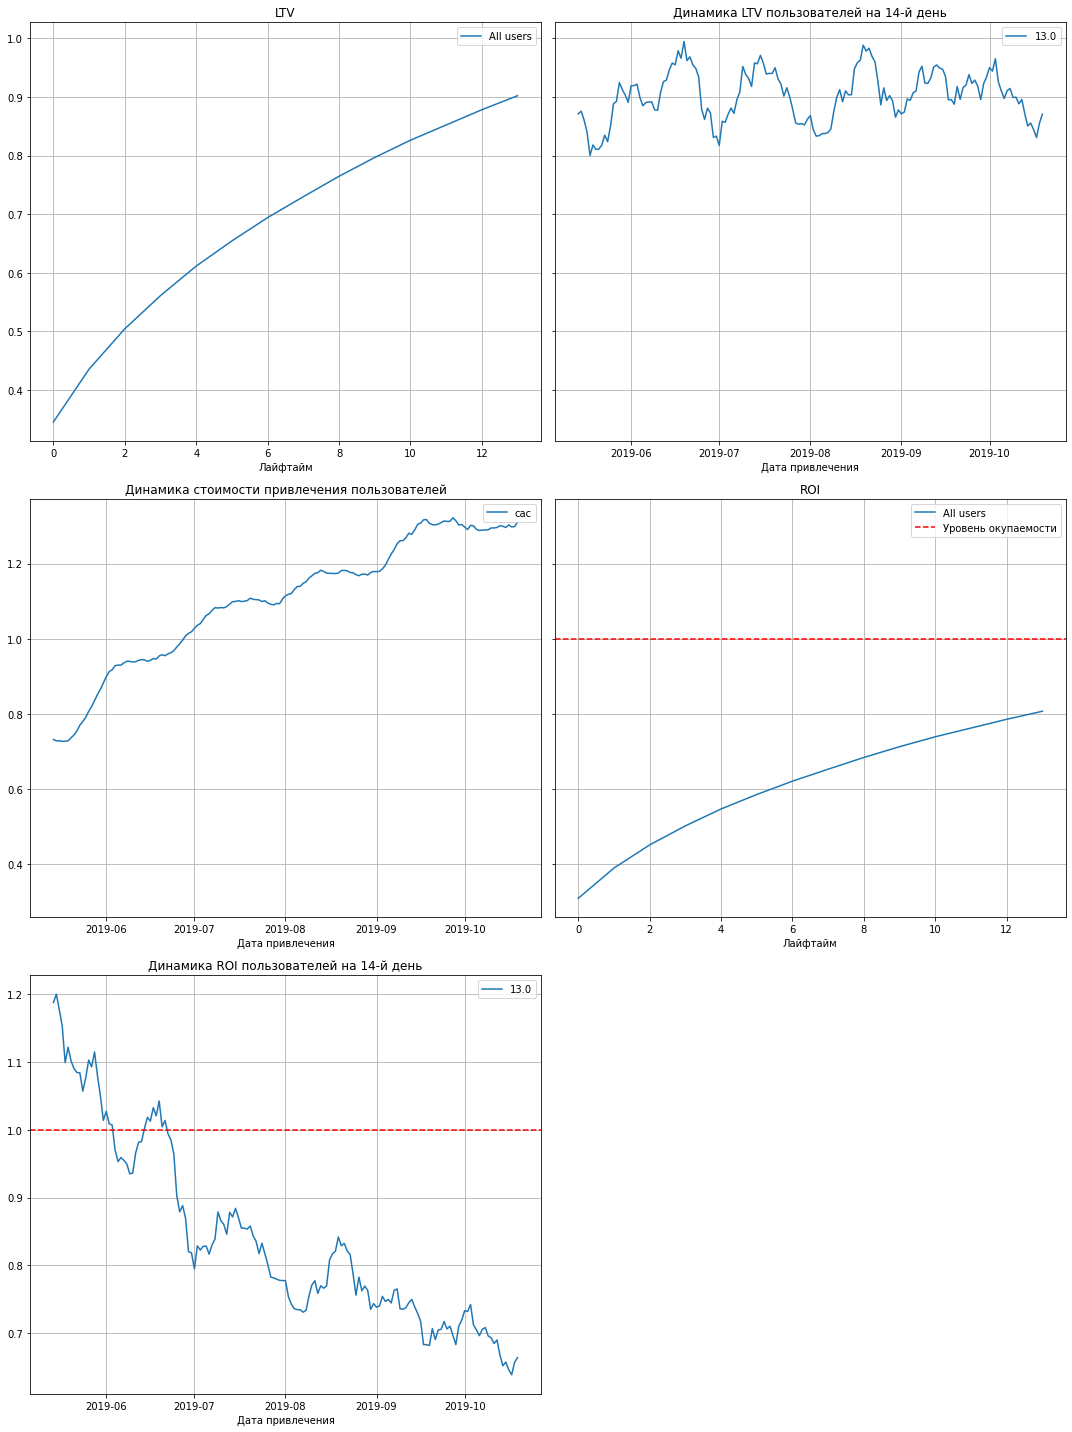

In [40]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Исходя из графиков мы видим, что реклама в целом не окупается совсем. По динамике ROI видно, что проблемы с окупаемостью возникли еще в июне, было некоторое время, когда реклама снова начала окупаться, но потом график стремительно идет вниз. 

При этом стоимость привлечения пользователя активно растет. То есть мы увеличили рекламный бюджет, но в итоге не получили достаточно продаж для того, чтобы наши вложения окупились. Получается что-то мешает нашим пользователям конвертироваться.

### Анализ окупаемости рекламы с разбивкой по устройствам

Проверим, как окупается реклама, для пользователей, которые заходят в приложение с различных устройств:

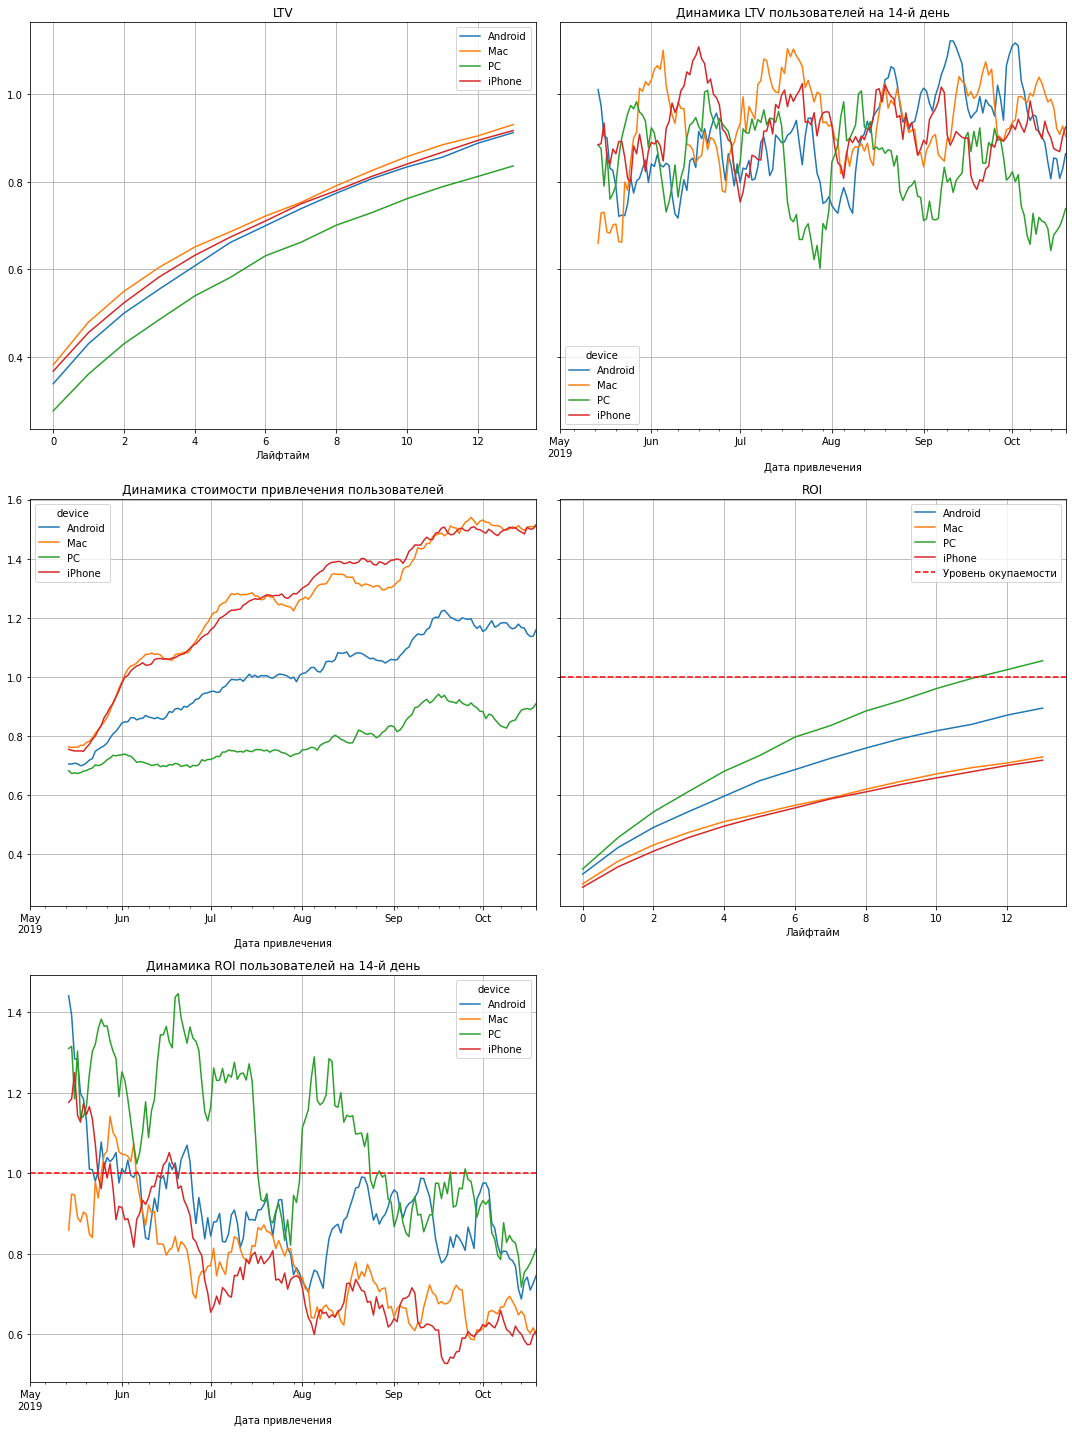

In [41]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['device']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Вероятнее всего проблема с окупаемостью не связана с устройствами, так как в целом низкие показатели у всех ОС. 

Совсем все плохо с Mac  и iPhone. Самые лучшие показатели у Android. По графику ROI видно, что только пользователи Android потратили достаточно, чтобы окупить расходы на рекламу. Однако в динамике все не так хорошо. С сентября вновь привлеченные пользователи этой ОС перестали окупаться. 

Возможно, что они держались с хорошими показателями так долго, потому что расходы на их привлечение не так высоки, как расходы на привлечение пользователей других ОС. 

### Анализ окупаемости рекламы с разбивкой по странам

Проверим данные по разным странам:

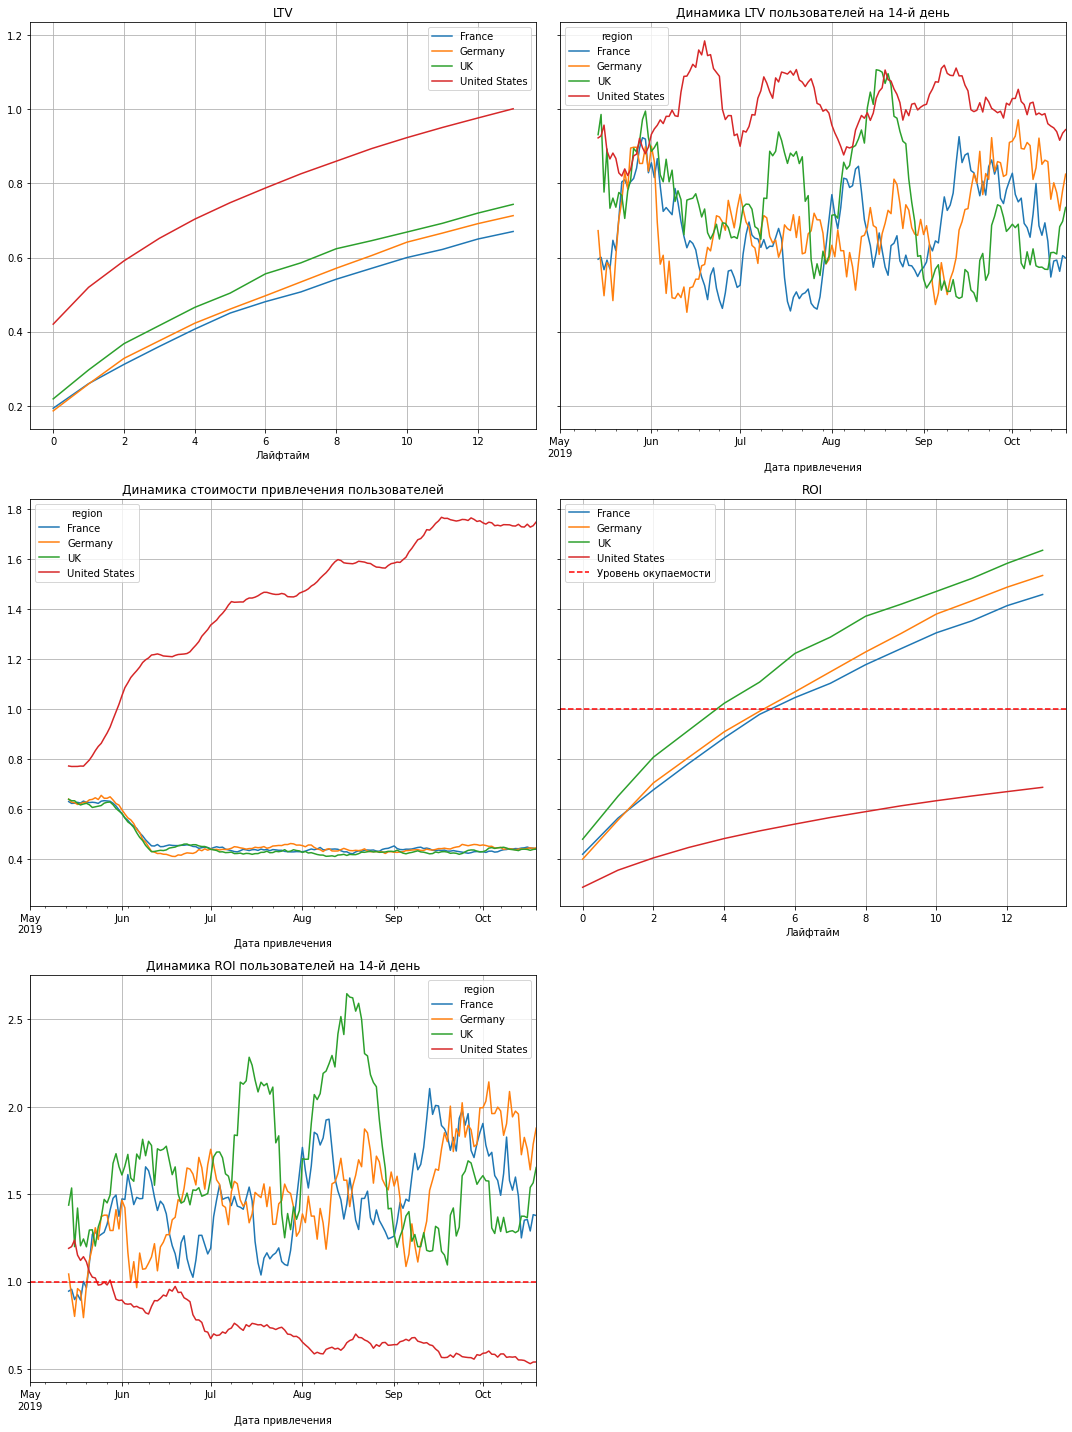

In [42]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['region']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По странам картина выглядит интереснее. Окупаются все пользователи кроме тех, которые пришли из США. Причем картина все хуже и хуже. Пользователи из США при этом самые дорогие, стоимость их привлечения в динамике намного выше, чем у пользователей других стран. 

Ранее мы выяснили, что пользователей из США у нас еще и больше всего, и приходят они с одних площадок. Значит именно для пользователей этого региона в нашем приложении есть какие-то проблемы, которые сказались на их окупаемости. 

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

Мы уже немного рассматривали данные с разбивкой по рекламным каналам, проверим еще раз с более подробными графиками:

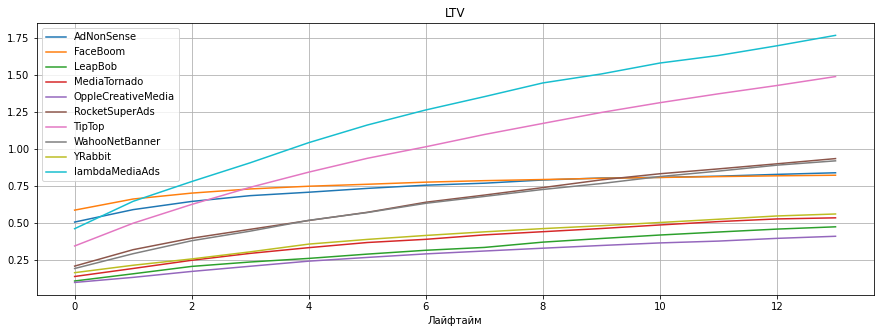

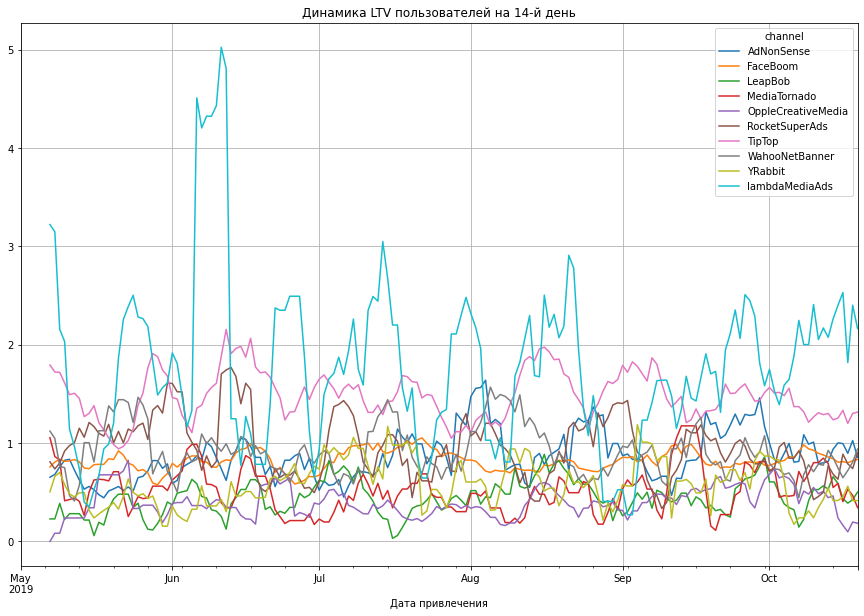

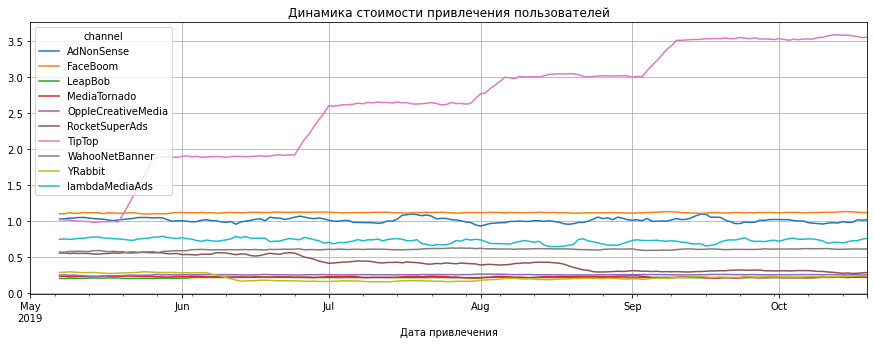

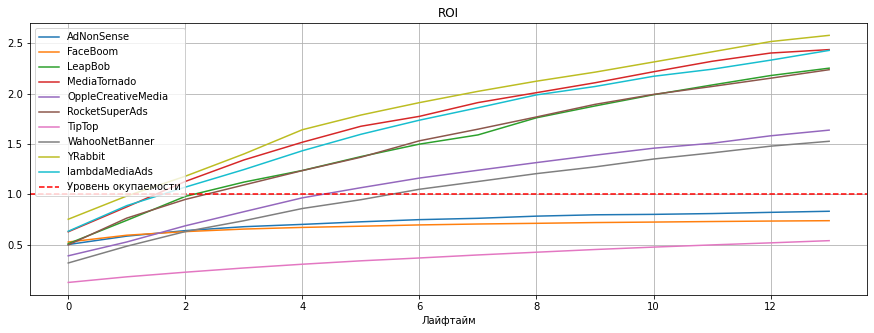

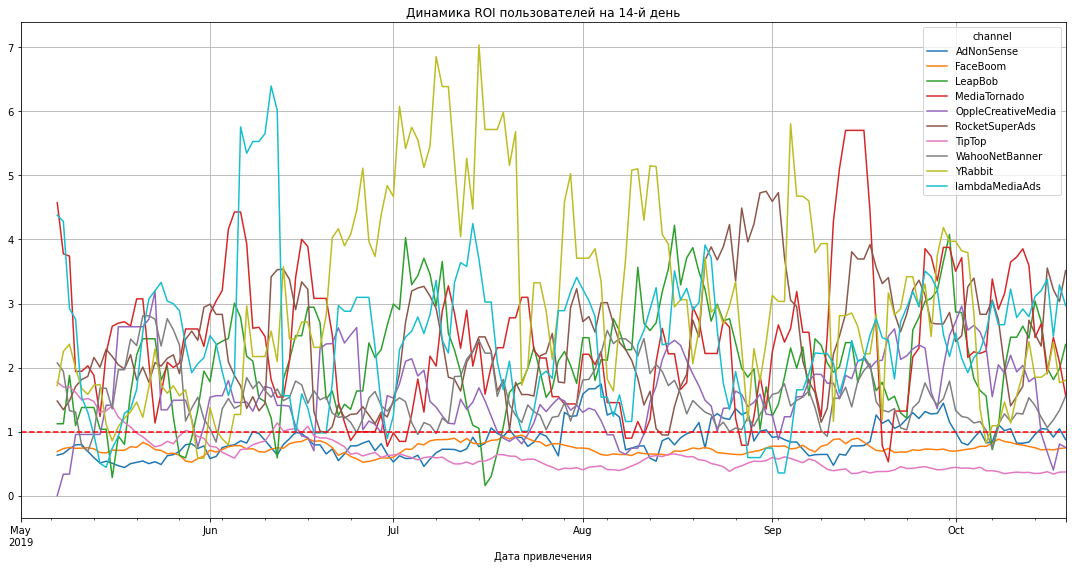

In [43]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel']
)

# строим графики
plot_ltv_roi_channel(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Так как рекламных каналов много, немного поменяли функцию, которая выводит графики. Это необходимо, чтобы данные было лучше видно. 

Помним, что больше всего мы тратим средств на площадки Faceboom и TipTop. По данным видим, что обе эти площадки совсем не окупаются. Такая же картина по площадке AdNonSense. 
На данные площадки мы тратим больше всего средств на рекламу, при этом получаем много пользователей, но их привлечение не окупается.

### Вывод

Для расчета окупаемости мы построили графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
Исходя из них видим:
- в целом реклама не окупается совсем, ROI максимум на уровне 80%
- мы тратим на привлечение пользователей все больше, вероятно из-за этого в том числе имеем проблемы с окупаемостью рекламы, так как траты на нее превышают наш доход от привлеченных пользователей
- при анализе данных по устройствам мы видим, что окупаются только пользователи, которые используют PC, но в динамике и с ними все не очень хорошо. Вероятно, что они окупались некоторое время по причине того, что стоимость их привлечения ниже
- при анализе данных по странам видно, что самые дорогие пользователи к нам приходят из США, однако при этом они не окупаются вовсе. Затраты на их привлечение при этом растут постоянно. Из прошлых этапов анализа мы помним, что из США к нам в целом приходит больше всего пользователей
- при разбивке окупаемости по каналам привлечения видим ту картину, что и раньше. Каналы с самой высокой стоимостью привлечения одного пользователя (Faceboom, TipTop, AdNonSense) и затратами на рекламу не окупаются вовсе

## Анализ конверсии и удержания

Для того, чтобы сделать более точные выводы посмотрим на конверсию и показатель удержания по всем данным, в разбивке по устройствам, странам и каналам привлечения. 

### Анализ показателей конверсии и удержания по всем данным

Рассчитываем показатели удержания по всем данным, формируем диаграммы удержания платящих, не платящих пользователей, а также динамику их удержания на 14 день:

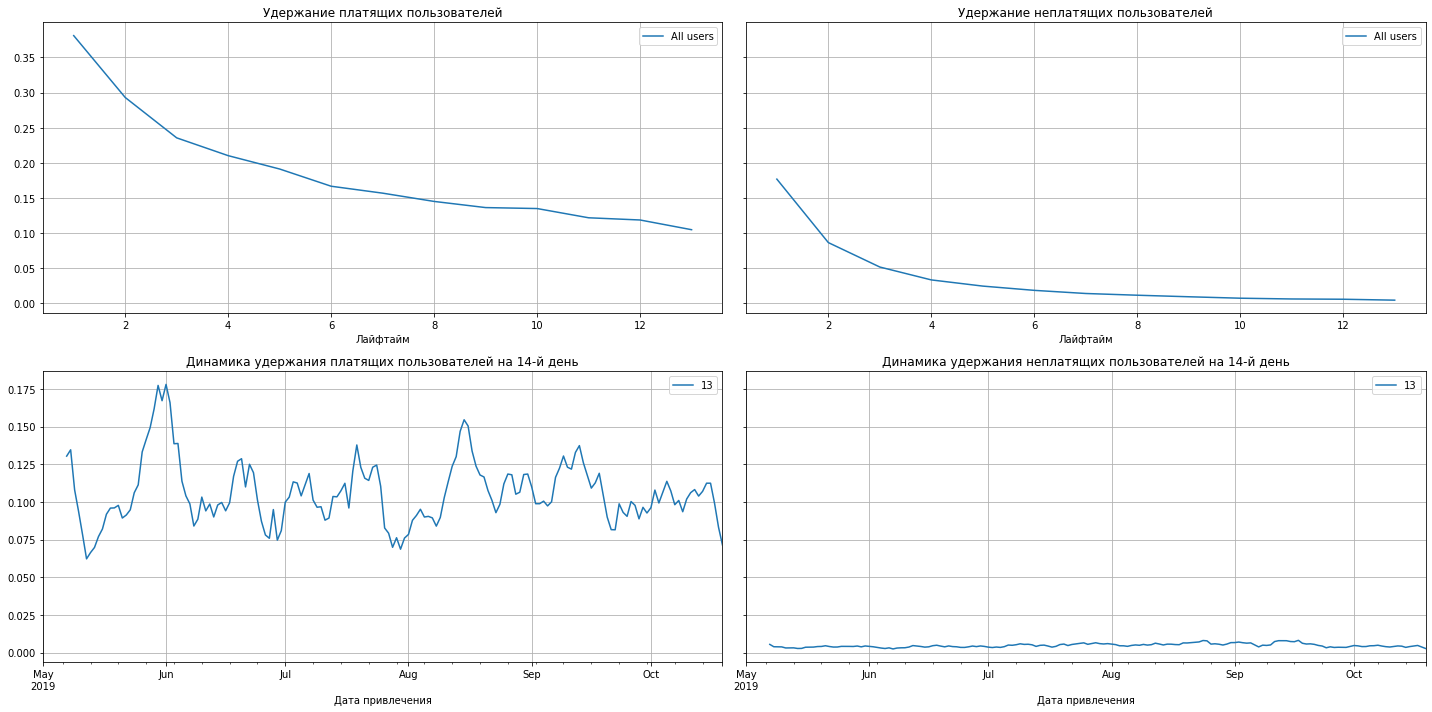

In [44]:
# рассчитываем Retention Rate
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

# строим диаграммы
plot_retention(retention, retention_history, horizon_days)

По общим данным с удержанием пользователей в целом все не так плохо. В динамике мы видим, что удержание в течении анализируемого срока осталось на одному уровне. 

Посмотрим на конверсию:

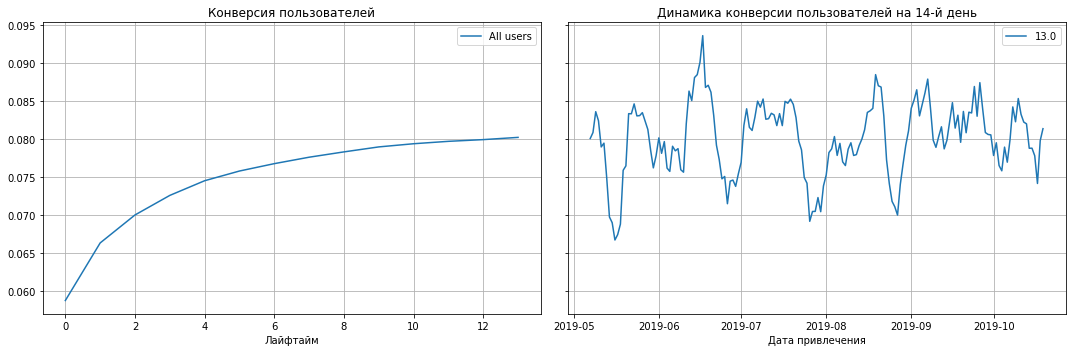

In [45]:
# рассчитываем Conversion Rate
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

# строим диаграммы
plot_conversion(conversion, conversion_history, horizon_days)

Конверсия в целом на достаточно хорошем уровне. Однако ее показатель растет только до 10 дня, далее остается примерно на одном уровне. Пожалуй, это не слишком хорошо. 

Посмотрим данные более подробно в разбивке по разных показателям. 

### Анализ показателей конверсии и удержания по устройствам

Посмотрим конверсию и удержание с разбивкой по устройствам:

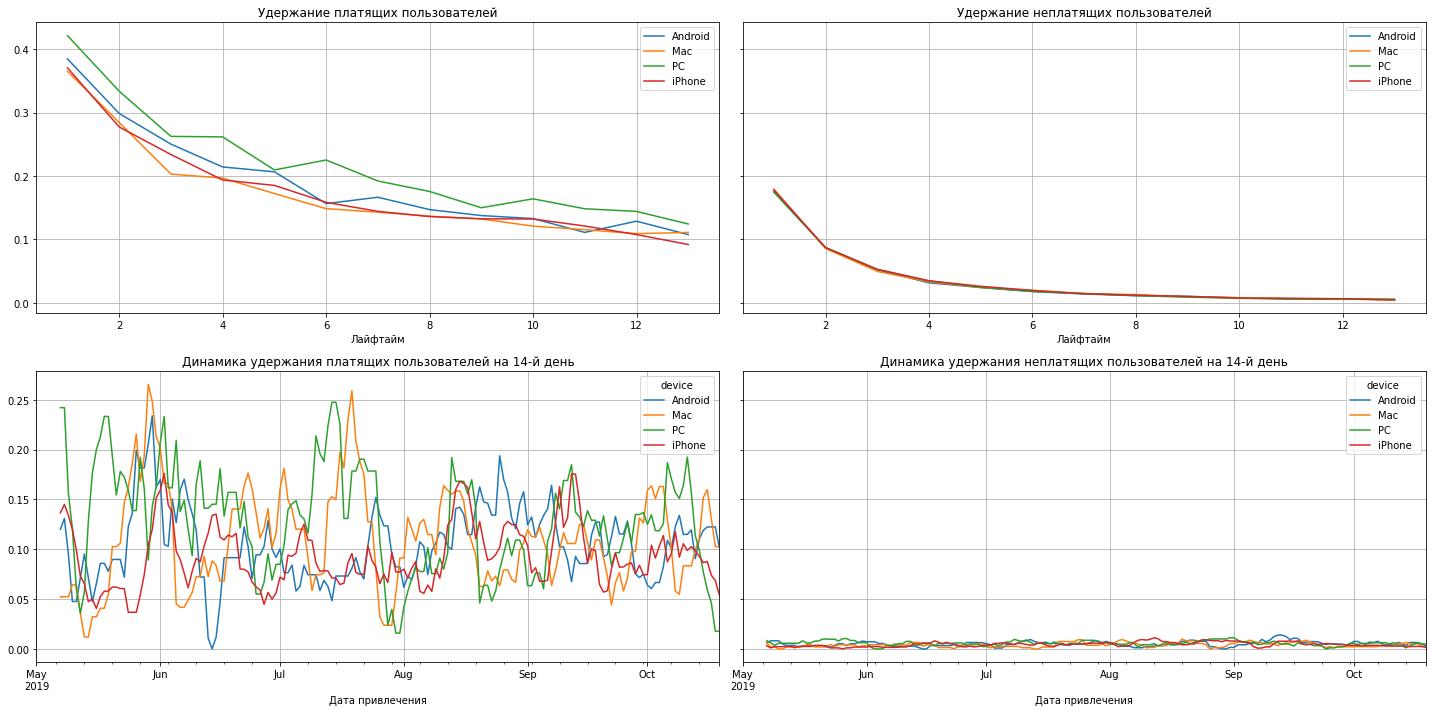

In [46]:
# рассчитываем Retention Rate
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['device']
)

# строим диаграммы
plot_retention(retention, retention_history, horizon_days)

Как мы заметили ранее, в разбивке по разным устройствам данные приблизительно одинаковы. Вероятно, что наша убыточность не связана именно с устройствами, с которых к нам приходят пользователи. На примере показателей удержания мы в целом видим тоже самое. У пользователей РС картина в целом немного лучше, чем у пользователей остальных устройств. 

Если смотреть данные в динамике, то по ней самые неплохие показатели у тех, кто использовал МАС и РС. Но в целом они все примерно на одном уровне. 

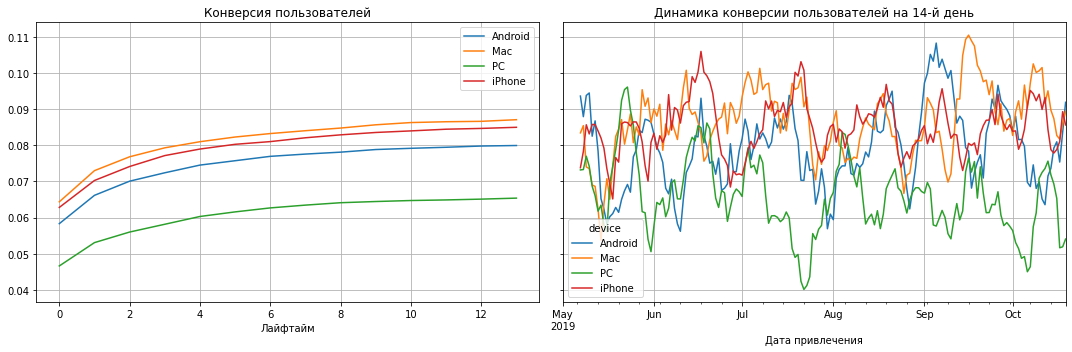

In [47]:
# рассчитываем Conversion Rate
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['device']
)

# строим диаграммы
plot_conversion(conversion, conversion_history, horizon_days)

При рассмотрении данных по конверсии видим, что данные отличаются. Ранее мы видели, что у нас окупаются только пользователи РС, но похоже при этом у них самый низкий показатель конверсии из всех. Самые дорогие пользователи, которые используют iPhone и МАС имеют наиболее высокую конверсию, но как мы помним даже такая высокая конверсия данных пользователей не окупается. 

### Анализ показателей конверсии и удержания по странам

Теперь посмотрим данные по странам:

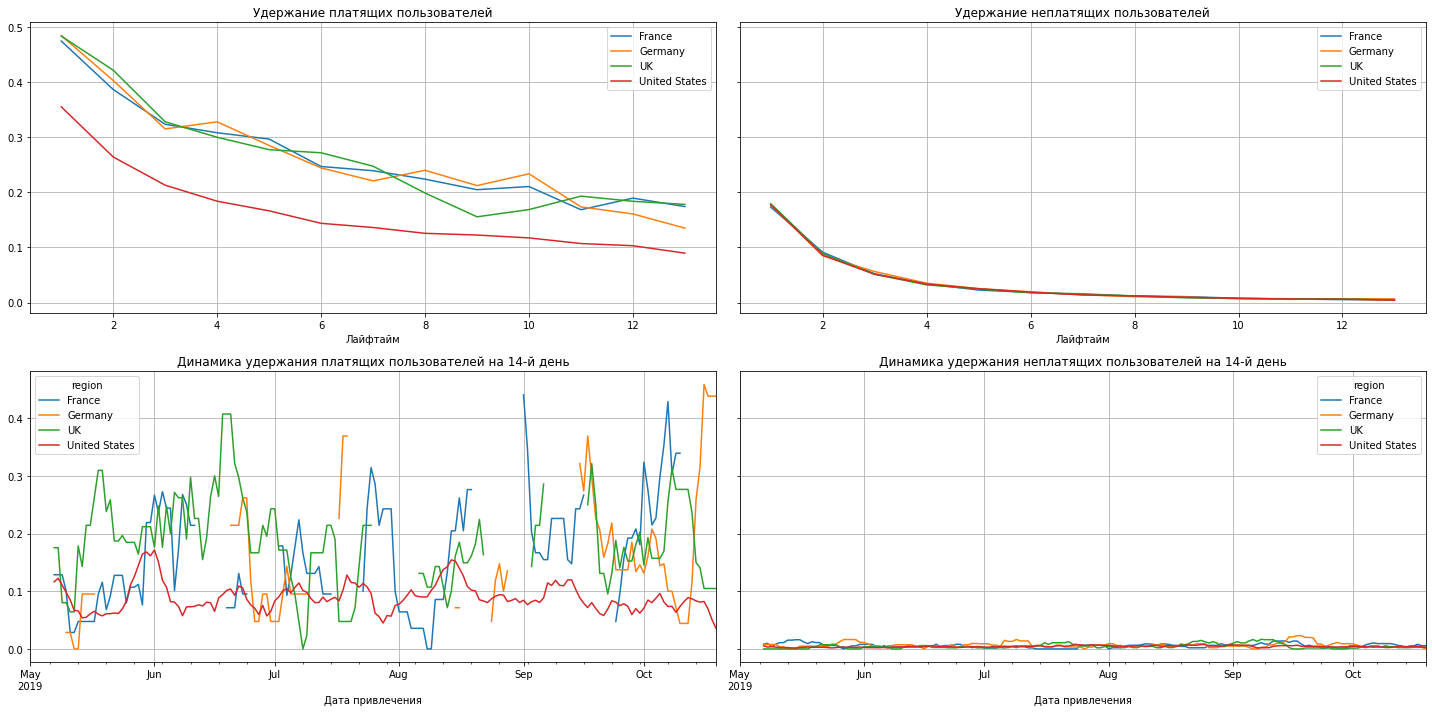

In [48]:
# рассчитываем Retention Rate
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['region']
)

# строим диаграммы
plot_retention(retention, retention_history, horizon_days)

Данные довольно интересные. Показатели удержания пользователей из США ниже, чем показатели удержания пользователей других стран. Однако видимо из-за своего количества пользователи из США во все месяца, которые мы рассматриваем, доживали до 14 дня лайфтайма. А вот пользователи других стран не всегда, об этом нам говорит график динамики удержания платящих пользователей. 

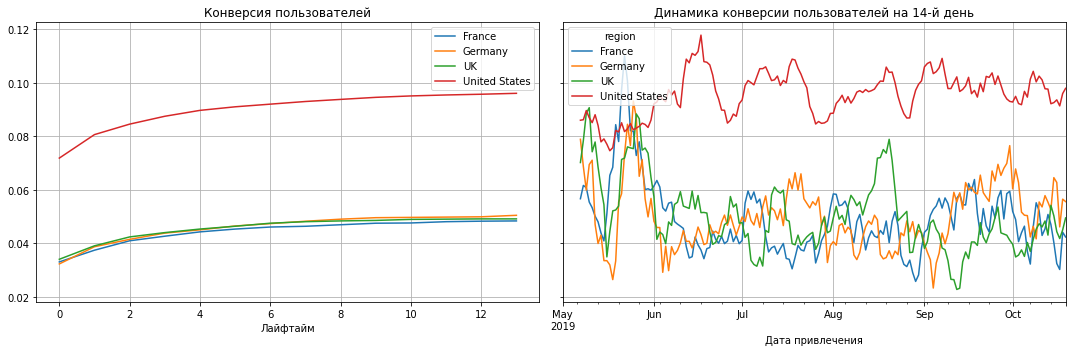

In [49]:
# рассчитываем Conversion Rate
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['region']
)

# строим диаграммы
plot_conversion(conversion, conversion_history, horizon_days)

У пользователей из США самый высокий показатель конверсии. Вероятнее всего при увеличении рекламного бюджета мы ориентировались именно на этот показательно. Но так как показатель удержания у них низкий, то они, увы, не окупаются. При этом затраты на их привлечение самые высокие. 

### Анализ показателей конверсии и удержания по каналам привлечения

Теперь посмотрим данные по разным каналам привлечения:

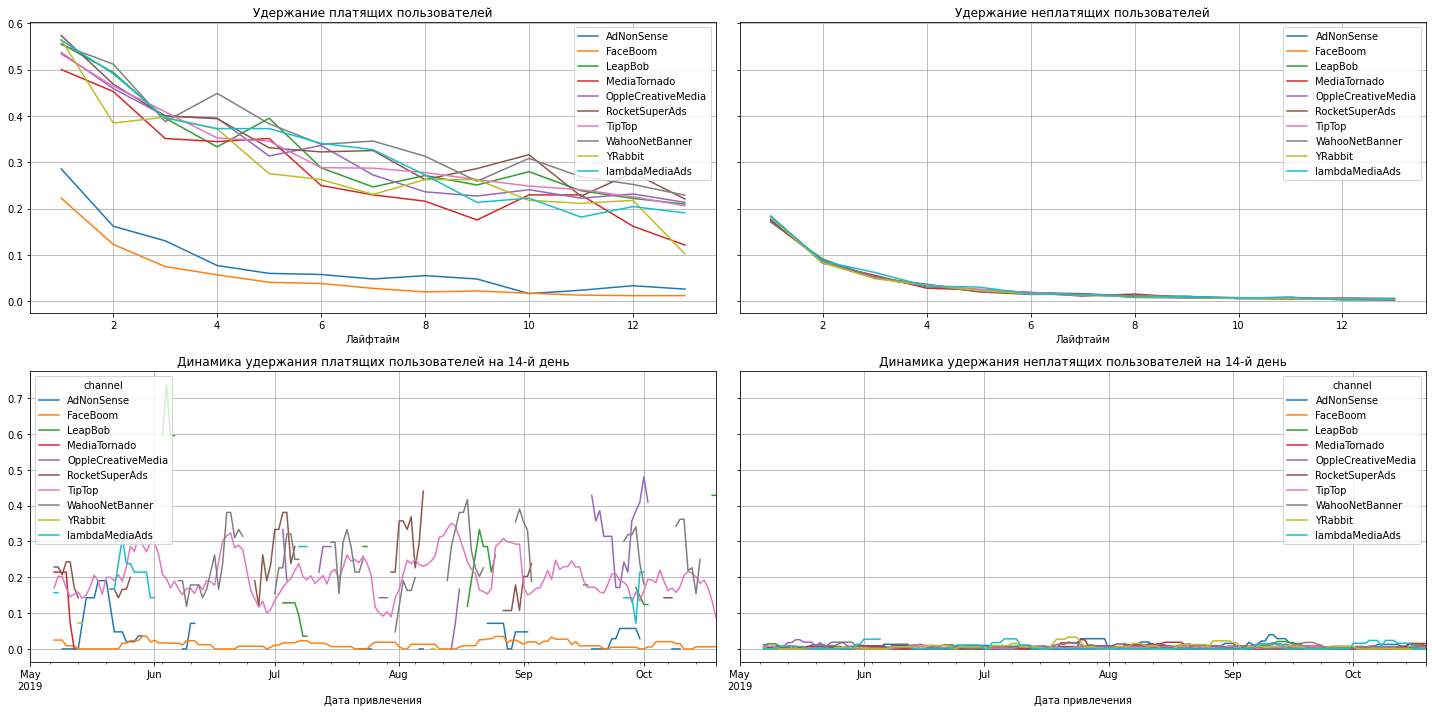

In [50]:
# рассчитываем Retention Rate
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['channel']
)

# строим диаграммы
plot_retention(retention, retention_history, horizon_days)

У Faceboom, AdNonSense самые низкие показатели удержания в сравнении с другими площадками. Как мы помним на них мы много средств на привлечение. Площадка TipTop показывает данные по удержанию выше, чем две другие площадки. 

В динамике мы видим, что платящие пользователи не всегда доживают до 14 дня. Кривые не прерываются только у TipTop и Faceboom. При этом у Faceboom показатели в динамике самые низкие из всех. 

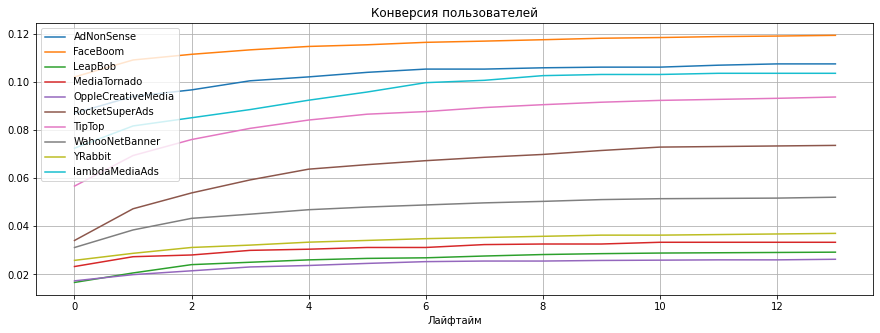

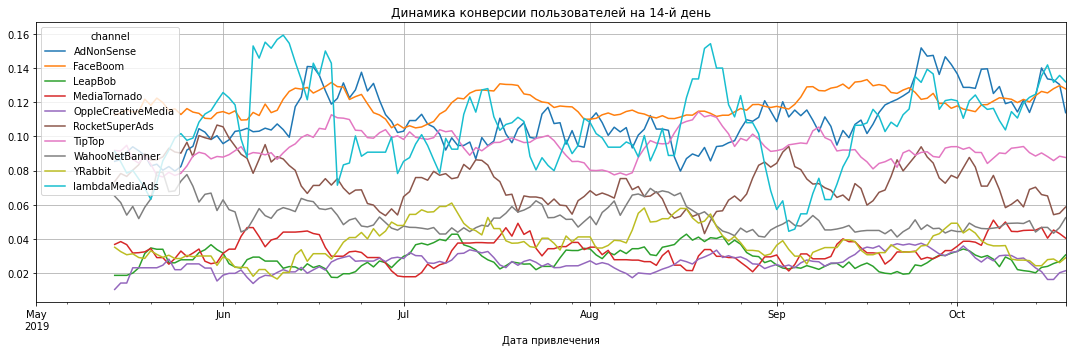

In [51]:
# рассчитываем Conversion Rate
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel']
)

# строим диаграммы
plot_conversion_channel(conversion, conversion_history, horizon_days)

Самые высокие показатели конверсии Faceboom, AdNonSense, вкупе с плохим удержанием отсюда и получаем убытки. В тоже время наша самая дорогая площадка TipTop показывает не самую высокую конверсию, но удержание у нее лучше, чем  у других двух наших лидеров.

Также стоит обратить внимание на lambdaMediaAds. Из прошлых графиков мы видели, что с этой площадки мы выкупаем меньше всего пользователей. Однако количество платящих пользователей на ней весьма велико и конверсия также высокая, при условии хорошего показателя удержания. 

### Вывод

Мы рассмотрели конверсию и удержание в целом по датасету, с разбивкой по устройствам, странам и каналам. 
Исходя из данных мы обратили внимание, что тратим много средств на тех пользователей чья конверсия выше. Это те, кто пользуются iPhone и МАС, приходят к нам из США и с таких площадок как Faceboom, AdNonSense. Однако с удержанием данных пользователей все намного хуже, чем с другими. Исходя из данных, которые мы получили ранее, мы видим, что тратим на них больше всего средств. 

Также мы вновь обратили внимание на площадку TipTop. На привлечение одного пользователя с нее мы тратим больше всего средств. Однако показатели конверсии у нее не так высоки, хотя удержание в целом выглядит не плохо. 

## Общий вывод

При работе с данными мы не обнаружили пропусков и дубликатов, поэтому все данные были сохранены для анализа в полном объеме. 

Что мы обнаружили:
- больше всего пользователей приходят к нам из США, эти пользователи используют iphone или МАС и приходят к нам с одних площадок (TipTop, Faceboom)
- за одного привлеченного пользователя, полученного с площадок TipTop, Faceboom, а также AdNonSense мы платим много больше, чем с остальных. Пользователи площадки TipTop дороже в два раза, чем средние траты на привлечение одного пользователя по всем площадкам
- если рассматривать медианное значение затрат от месяца к месяцу, то оно остается на одном уровне, а вот средние затраты увеличиваются. Это значит, что у нас растет цена изначально более дорогих клиентов
- исходя из анализа общей окупаемости мы видим, что реклама не окупается совсем. ROI максимум на 80%
- при рассмотрении данных в разбивке по разным параметрам видим, что траты на привлечение пользователей из США растут, а их окупаемость падает. Площадки, которые приводят нам данных клиентов, являются самыми дорогими для нас и их ROI совсем не доходит до 100%
- при анализе удержания и конверсии мы видим, что у самых дорогих для нас пользователей самые высокие показатели конверсии, однако самые плохие показатели удержания


Рекомендации по итогам анализа:
- рассмотреть, как ведут себя пользователи из США, привлекаемые с площадок TipTop, Faceboom на предмет того, почему у данных пользователей самые низкие показатели удержания, с какими техническими сложностями сталкиваются данные пользователи. Оптимизировать рекламные кампании и приложение исходя из этого. Либо улучшить нацеливание рекламы, либо исправить те моменты, которые негативно влияют на удержание
- не увеличивать расходы на рекламу по не окупающимся площадкам, особенно обратить внимание на TipTop, так как пользователи оттуда самые дорогие, но имеют конверсию ниже, чем по Faceboom и другим дорогим площадкам
- попробовать перераспределить бюджеты на другие площадки имеющие лучшие показатели окупаемости. Например, lambdaMediaAds, хотя привлечение одного пользователя с нее тоже не самое дешевое, однако эти пользователи имеют высокие показатели конверсии и удержания
- возможно сделать больший упор на клиентов из Европы, так как у них лучше показатели окупаемости